In [69]:
import importlib

import utils
importlib.reload(utils)

<module 'utils' from '/home/CPSC322-Final-Project/utils.py'>

# **Asthma Diagnosis**

### *Team members: Lauren Chin and Lauren Nguyen*

## Dataset

* Source: [Asthma Dataset](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset) 
* Format: CSV File
* Contents: This data set contains the patient information for those who are diagnosed with Asthma. Asthma is a chronic lung disease that causes inflamation and tightening of the airways, often making it hard to breath. This dataset contains 2,392 different patients that involve their medical history, symptoms, allergies, and much more.
* Attributes:
    * `PatientID` - a unique identifier for each patient
    * `Age` - age of patient
    * `Gender` - 0 for male and 1 for female
    * `Ethnicity` - encoded as:
        * 0: Caucasian
        * 1: African American
        * 2: Asian
        * 3: Other
    * `EducationLevel` - encoded as:
        * 0: None
        * 1: High School
        * 2: Bachelors
        * 3: Higher
    * `BMI` - body mass index, ranges from 15-40
    * `Smoking` - 0 for no and 1 for yes
    * `PhysicalActivity` - weekly physical activity(hours), ranges 0-10
    * `DietQuality` - ranges from 0-10
    * `SleepQuality` - ranges from 4-10
    * `PollutionExposure` - scored from 0-10
    * `PollenExposure` - scored from 0-10
    * `DustExposure` - scored from 0-10
    * `LungFunctionFEV1` - Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.
    * `LungFunctionFVC` - Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.
    * `PetAllergy`
    * `FamilyHistoryAsthma` 
    * `HistoryOfAllergies`
    * `Eczema` 
    * `HayFever` 
    * `GastroesophagealReflux`
    * `Wheezing`
    * `Coughing`
    * `ChestTightness`
    * `ShortnessOfBreath`
    * `NighttimeSymptoms`
    * `ExerciseInduced`
    * `DoctorInCharge` - doctor in charge, confidential for all instances
    * **`Diagnosis`** - diagnosis status for asthma patient. 0 for no and 1 for yes

    
    

## Implementation/Technical Merit

### Anticipated Challenges
* Pre-processing:
    * Because there are so many attributes, deciding to use a subset of them or all of them
        * To pare down the attributes, we could randomly select different subsets and compare the model performances to select the "best" attributes
        * However, we instead will likely use unsupervised learning to graph the attributes in comparison to the classifier attribute and determine which attributes have the strongest correlations and use those
    * Discretizing our dataset could be a challenge because there are many attributes with float values that are quite specific (lots of decimal places)
        * For example some of these attributes are: PhysicalActivity (0-10, but float long decimals), DietQuality (0-10, but float long decimals), SleepQuality (4-10, but float long decimals), and others

* Classification: 
    * Because there are so many attributes, making sure that we don't overfit our model
    

## Potential Impact of Results

* Why these results are useful:
    * We are looking at the asthma dataset with the goal of creating classifiers to predict if someone has asthma or not
    * These results are useful because it can help with medical diagnosis
    * While asthma isn't as life threatening as a disease like cancer, detection is still important so measures can be taken to help ease symptoms for patients

* Stakeholders:
    * Doctors (people who have to make the medical diagnosis)
    * Patients (people who could potentially have asthma)


# Loading Data

In [70]:
table = utils.load('asthma_disease_data.csv')

headers = table.pop(0)

# Cleaning

1. Removing unnecessary features
    * `EducationLevel`
    * `DoctorInCharge`

In [71]:
table, headers = utils.remove_cols(table, headers, ['EducationLevel', 'DoctorInCharge'])

# Exploratory Data Analysis (EDA)

## Data Visualization
Scatter Plots with linear regression fit lines
* Age vs. Diagnosis
* Gender vs. Diagnosis
* Ethnicity vs. Diagnosis
* EducationLevel vs. Diagnosis
* BMI vs. Diagnosis
* Smoking vs. Diagnosis
* PhysicalActivity vs. Diagnosis
* PollutionExposure vs. Diagnosis
* LungFunctionFEV1 vs. Diagnosis
* LungFunctionFVC vs. Diagnosis

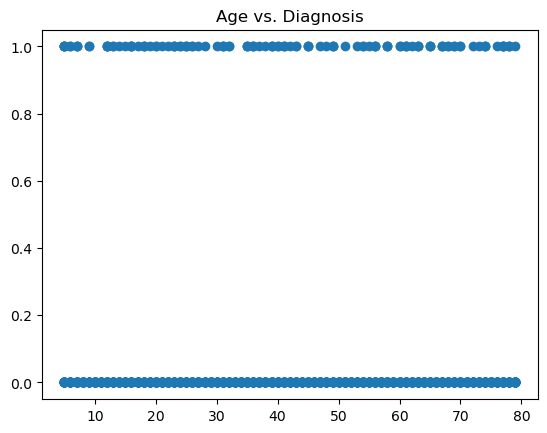

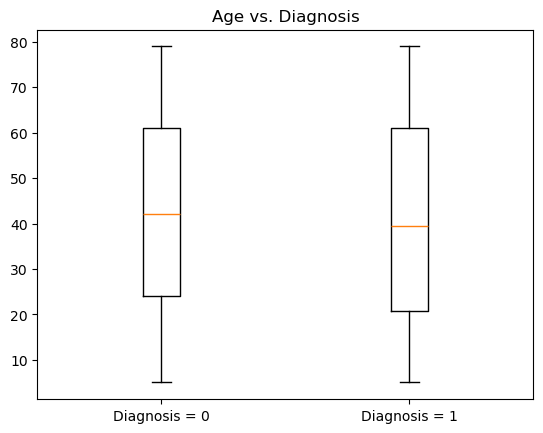

In [72]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats

importlib.reload(utils)
np.random.seed(0)

# Age vs Diagnosis
x = [int(val) for val in utils.get_column(table, headers, "Age")]
y = [int(val) for val in utils.get_column(table, headers, "Diagnosis")]

# Scatter Plot
plt.scatter(x,y)
plt.title("Age vs. Diagnosis")

# Box Plots
# Splitting age based on diagnosis
age_diagnosis_0 = [age for age, diag in zip(x, y) if diag == 0]
age_diagnosis_1 = [age for age, diag in zip(x, y) if diag == 1]

# Box plot function
def box_plot(distributions, labels, title):
    plt.figure()
    plt.boxplot(distributions, labels=labels)
    plt.title(title)
    plt.show()

# Calling the box plot function with the data
box_plot([age_diagnosis_0, age_diagnosis_1], ["Diagnosis = 0", "Diagnosis = 1"], "Age vs. Diagnosis")

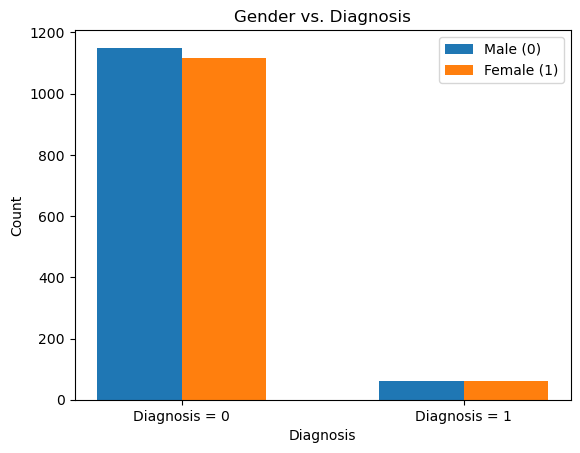

In [ ]:
# Gender vs Diagnosis
x = [int(val) for val in utils.get_column(table, headers, "Gender")]

# Counting the number of males (Gender = 0) and females (Gender = 1) for each Diagnosis category
gender_counts_0 = [sum(1 for gender, diag in zip(x, y) if gender == 0 and diag == 0),  # Male (Gender = 0) and Diagnosis = 0
                   sum(1 for gender, diag in zip(x, y) if gender == 0 and diag == 1)]  # Male (Gender = 0) and Diagnosis = 1

gender_counts_1 = [sum(1 for gender, diag in zip(x, y) if gender == 1 and diag == 0),  # Female (Gender = 1) and Diagnosis = 0
                   sum(1 for gender, diag in zip(x, y) if gender == 1 and diag == 1)]  # Female (Gender = 1) and Diagnosis = 1

# Bar chart function
def bar_chart(x, y, title):
    plt.figure()
    width = 0.3  # Width of bars
    index = np.arange(len(x))  # Positions of bars
    
    # Plotting bars for males and females
    plt.bar(index - width/2, y[0], width, label="Male (0)")  # Bars for males
    plt.bar(index + width/2, y[1], width, label="Female (1)")  # Bars for females
    
    # Adding labels, title, and legend
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(index, x)  # Set x-axis labels to 'Diagnosis = 0' and 'Diagnosis = 1'
    plt.legend()
    
    plt.show()

# Labels and counts for bar chart
labels = ['Diagnosis = 0', 'Diagnosis = 1']
# Counts for males and females in a tuple (male counts, female counts)
counts = [gender_counts_0, gender_counts_1]

# Calling the bar chart function with the data
bar_chart(labels, counts, "Gender vs. Diagnosis")